# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import matplotlib.pyplot as plt

In [2]:
!pip install spacy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
import spacy
spacy.__version__

2023-05-28 19:08:56.866113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 19:08:59.156124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-28 19:08:59.156163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: c50bc674bc27
2023-05-28 19:08:59.156175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: c50bc674bc27
2023-05-28 19:08:59.156265: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-05-28 19:08:59.156299: I

'3.5.3'

In [4]:
# Temporário por problemas no Colab
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [5]:
!python3 -m spacy download pt_core_news_sm

2023-05-28 19:09:03.942375: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 9.9 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [6]:
import pt_core_news_sm

In [7]:
nlp = pt_core_news_sm.load()
nlp

In [8]:
!pip install pandas
!pip install seaborn
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [9]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento da base de dados

In [10]:
base_dados = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [11]:
base_dados.shape

(7357, 7)

In [12]:
base_dados.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos


In [13]:
base_dados.tail()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
7352,Toda a ideia original do Nubank de simplificar...,Leandro C.,1,1,0,0,sentimentos
7353,"Cada vez peor, cuando llegó fui uno de los pri...",Haguen Alferogh,1,1,0,0,sentimentos
7354,"É um ótimo app, o melhor controle de cartão de...",A Google user,4,0,0,1,sentimentos
7355,"Era bom, hoje em dia so passo vergonha. App fu...",Arthwr Ozaki,5,0,0,1,sentimentos
7356,Falta de vontade de quem te atende de enviar u...,Fabio A,1,1,0,0,sentimentos


<Axes: xlabel='Rating', ylabel='count'>

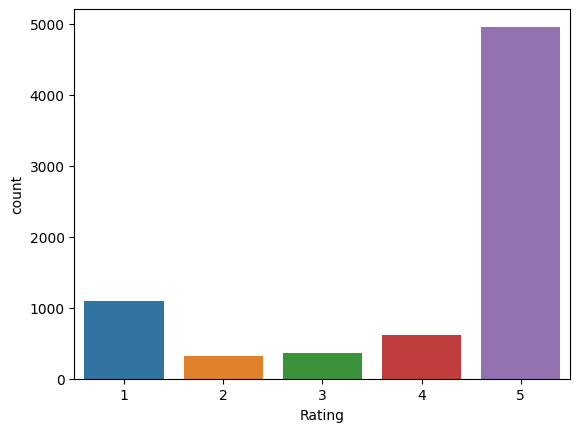

In [14]:
base_dados['Rating'] = base_dados['Rating'].round()
sns.countplot(x='Rating', data=base_dados)

# Etapa 3: Função para pré-processamento dos textos

In [15]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [17]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [18]:
len(stop_words)

416

In [19]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [20]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = nlp(texto)
  
  lista = []
  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [21]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural curso curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [22]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos
5,"It is failing lately, it lags and never opens,...",Sandra Villanueva,3,0,1,0,sentimentos
6,It used to be a good app. Now the UX is bloate...,Raul Kist,2,1,0,0,sentimentos
7,"Locked out of the app, can't pass by the finge...",Danilo de Queiroz,1,1,0,0,sentimentos
8,"Unbelievable, I just spent hours on the chat, ...",Monica V. Freitas,1,1,0,0,sentimentos
9,"It is an amazing and simple, easy-to-use app. ...",Rafa S,5,0,0,1,sentimentos


In [23]:
base_dados['Review'] = base_dados['Review'].apply(preprocessamento)

In [24]:
base_dados.head(10)

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos
5,it is Failing lately it lags and never opem i ...,Sandra Villanueva,3,0,1,0,sentimentos
6,it used to be good app now the ux is Bloated W...,Raul Kist,2,1,0,0,sentimentos
7,locked out of the app can't pass by the finger...,Danilo de Queiroz,1,1,0,0,sentimentos
8,unbelievable i just spent hours on the chat ta...,Monica V. Freitas,1,1,0,0,sentimentos
9,it is an amazing and simple easy-to-use app th...,Rafa S,5,0,0,1,sentimentos


### Tratamento da classe

In [25]:
exemplo_base_dados = [["este trabalho é agradável", {"Negative": 0, "Neutral": 1, "Positive": 2}],
                      ["este lugar continua assustador", {"Negative": 0, "Neutral": 1, "Positive": 2}]]

In [26]:
type(exemplo_base_dados)

list

In [27]:
exemplo_base_dados[0]

['este trabalho é agradável', {'Negative': 0, 'Neutral': 1, 'Positive': 2}]

In [28]:
exemplo_base_dados[0][0]

'este trabalho é agradável'

In [29]:
exemplo_base_dados[0][1]

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [30]:
type(exemplo_base_dados[0][1])

dict

In [31]:
base_dados_final = []
for texto, negative, neutral, positive in zip(base_dados['Review'], base_dados['NegativeRating'], base_dados['NeutralRatings'], base_dados['PositiveFeeling']):
  #print(texto, emocao)
  if negative == 1:
    dic = ({"Negative": True, "Neutral": False, "Positive": False})
  elif neutral == 1:
    dic = ({"Negative": False, "Neutral": True, "Positive": False})
  else: 
    dic = ({"Negative": False, "Neutral": False, "Positive": True})  

  base_dados_final.append([texto, dic.copy()])

In [32]:
len(base_dados_final)

7357

In [33]:
base_dados_final[0]

["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
 {'Negative': False, 'Neutral': False, 'Positive': True}]

In [34]:
base_dados_final[0][0]

"the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado"

In [35]:
base_dados_final[0][1]

{'Negative': False, 'Neutral': False, 'Positive': True}

In [36]:
type(base_dados_final[0][1])

dict

In [37]:
base_dados_final

[["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
  {'Negative': False, 'Neutral': False, 'Positive': True}],
 ["lately with every update the app gets Worse everytime that i want to Make payment i need to Confirm my identity the pig Savings money doesn't get interest anymore sincer the money need to stay one Month and every payment pick older money first the saving boxe canr only be withdrawn in business day horrible if you have an emergency outsidir ther and it is pushed emergency savings Loading time feel even longer With More Menu buttom and soft resets often during use",
  {'Negative': False, 'Neutral': False, 'Positive': True}],
 ["i Haven't been Able to access the app it won't allow to switch from brazil to mexico i don't Speak portugué so that suck i've uninstalled and re-download several time since that 's what i Was told to de o by customer service did

# Etapa 5: Criação do classificador

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np

## Pré-processamento do texto

In [39]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts([texto for texto, entities in base_dados_final])

## Conversão dos textos para sequências

In [40]:
sequences = tokenizer.texts_to_sequences([texto for texto, entities in base_dados_final])
padded_sequences = pad_sequences(sequences, padding='post')

## Transformando os rótulos para números

In [41]:
#labels = [entities for texto, entities in base_dados_final]
labels = [np.argmax(entities) for texto, entities in base_dados_final]
labels = tf.keras.utils.to_categorical(labels, num_classes=3) 

## Divisão dos dados em treino e teste

In [42]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

## Definição do modelo

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=padded_sequences.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(3, activation='softmax')
])

2023-05-28 19:10:20.621043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 19:10:20.623253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 19:10:20.625079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

## Compilação do modelo

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinamento do modelo

In [45]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100


2023-05-28 19:10:21.486702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 19:10:21.489612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 19:10:21.491882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

184/184 - 33s - loss: 0.1112 - accuracy: 1.0000 - val_loss: 8.1242e-06 - val_accuracy: 1.0000 - 33s/epoch - 177ms/step
Epoch 2/100
184/184 - 27s - loss: 7.6562e-06 - accuracy: 1.0000 - val_loss: 7.2079e-06 - val_accuracy: 1.0000 - 27s/epoch - 147ms/step
Epoch 3/100
184/184 - 27s - loss: 6.7322e-06 - accuracy: 1.0000 - val_loss: 6.3051e-06 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 4/100
184/184 - 27s - loss: 5.8744e-06 - accuracy: 1.0000 - val_loss: 5.4921e-06 - val_accuracy: 1.0000 - 27s/epoch - 146ms/step
Epoch 5/100
184/184 - 27s - loss: 5.1334e-06 - accuracy: 1.0000 - val_loss: 4.8041e-06 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 6/100
184/184 - 27s - loss: 4.5053e-06 - accuracy: 1.0000 - val_loss: 4.2420e-06 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 7/100
184/184 - 27s - loss: 3.9804e-06 - accuracy: 1.0000 - val_loss: 3.7450e-06 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 8/100
184/184 - 27s - loss: 3.5375e-06 - accuracy: 1.0000 - val_l

Epoch 62/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 63/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 146ms/step
Epoch 64/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 146ms/step
Epoch 65/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 146ms/step
Epoch 66/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 67/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 68/100
184/184 - 27s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 27s/epoch - 145ms/step
Epoch 69/100
184/184 - 27s - loss: 0.0000e+00 - 

## Plot do histórico de treinamento

Text(0, 0.5, 'Erro')

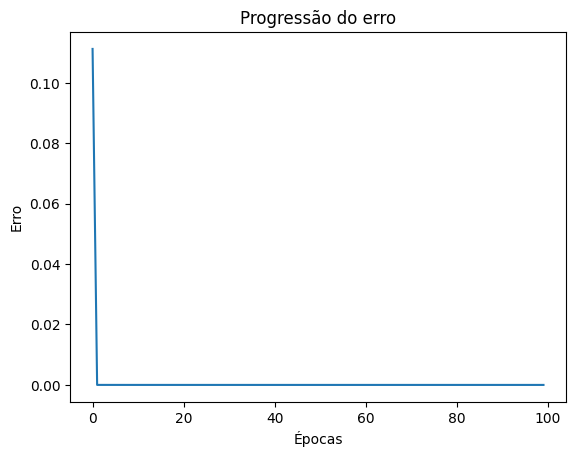

In [46]:
plt.plot(history.history['loss'])
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

## Salvando o modelo

In [47]:
model.save("modelo.h5")


## Baixando o modelo no Google Colab

In [48]:
#from google.colab import files
#files.download("modelo.h5")

# Etapa 6: Testes com uma frase

In [49]:
from tensorflow.keras.models import load_model

In [ ]:
modelo_carregado = load_model('modelo.h5')
modelo_carregado

In [ ]:
modelo_carregado.summary()

In [50]:
texto_positivo = 'Parabéns pelo app!'

In [51]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'parabéns por o app'

In [52]:
previsao = modelo_carregado(texto_positivo)
previsao

parabéns por o app

In [53]:
previsao.cats

{'Negative': 6.504732482426334e-06,
 'Neutral': 4.481750526252881e-09,
 'Positive': 0.9999934434890747}

In [80]:
texto_negativo = 'Tenho 1 ano e meio com este cartão e paguei integralmente todos os meses sem demora e há uma semana bloquearam meu cartão sem conseguir desbloqueá-lo por erros próprios.'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'Negative': 0.9999860525131226,
 'Neutral': 7.660192977709812e-07,
 'Positive': 1.324277855019318e-05}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [84]:
previsoes = []
for texto in base_dados['Review']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao)

In [83]:
previsoes.cats

AttributeError: 'list' object has no attribute 'cats'

In [57]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [58]:
previsoes_final

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [59]:
respostas_reais = base_dados['Review'].values
respostas_reais

array(["the app has improved significantly sometime it takes while to Load but definitely it 's in better state es ha mejorar en cuar tarda en cargar pero ya en mucho mejor Estado",
       "lately with every update the app gets Worse everytime that i want to Make payment i need to Confirm my identity the pig Savings money doesn't get interest anymore sincer the money need to stay one Month and every payment pick older money first the saving boxe canr only be withdrawn in business day horrible if you have an emergency outsidir ther and it is pushed emergency savings Loading time feel even longer With More Menu buttom and soft resets often during use",
       "i Haven't been Able to access the app it won't allow to switch from brazil to mexico i don't Speak portugué so that suck i've uninstalled and re-download several time since that 's what i Was told to de o by customer service didn't help",
       ...,
       'app controle cartão crédito fácil problema infelizmente demor liberar func

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score

0.0

In [61]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Avaliação na base de teste

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [63]:
base_dados_teste = pd.read_csv('sentimentos.csv', encoding = 'utf-8')

In [64]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,"The app has improved significantly, sometimes ...",Joel Hernández,4,0,0,1,sentimentos
1,"Lately, with every update the app gets worse: ...",Lucas Santos,3,0,1,0,sentimentos
2,I haven't been able to access the App. It won'...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,I have 1 and a half years with this card and I...,Ramón Quijas,1,1,0,0,sentimentos
4,Very helpful app. The card arrived very fast a...,Emmanuelle Silva,5,0,0,1,sentimentos


In [65]:
base_dados_teste['Review'] = base_dados_teste['Review'].apply(preprocessamento)

In [66]:
base_dados_teste.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos


In [67]:
previsoes = []
for texto in base_dados_teste['Review']:
  texto = preprocessamento(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [68]:
previsoes_final = []
for previsao in previsoes:
  if previsao['Negative'] > previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Negative')
  elif previsao['Neutral'] > previsao['Positive']:
    previsoes_final.append('Neutral')  
  else:
    previsoes_final.append('Positive')

previsoes_final = np.array(previsoes_final)

In [69]:
base_dados_teste

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,the app has improved significantly sometime it...,Joel Hernández,4,0,0,1,sentimentos
1,lately with every update the app gets Worse ev...,Lucas Santos,3,0,1,0,sentimentos
2,i Haven't been Able to access the app it won't...,Oscar D. Molina Sosa,3,0,1,0,sentimentos
3,i have and Half years With thi card and i have...,Ramón Quijas,1,1,0,0,sentimentos
4,very helpful app the card arrived very fast at...,Emmanuelle Silva,5,0,0,1,sentimentos
...,...,...,...,...,...,...,...
7352,ideia original de o nubank simplificar existir...,Leandro C.,1,1,0,0,sentimentos
7353,peor cuar llegó uno los primero usuario en Sol...,Haguen Alferogh,1,1,0,0,sentimentos
7354,app controle cartão crédito fácil problema inf...,A Google user,4,0,0,1,sentimentos
7355,hoje dia so passo vergonha app funcionar quere...,Arthwr Ozaki,5,0,0,1,sentimentos


In [70]:
previsoes_final

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [71]:
def convert_ratings(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [72]:
respostas_reais = base_dados_teste['Rating'].apply(convert_ratings).values

In [73]:
respostas_reais

array(['Positive', 'Neutral', 'Neutral', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [74]:
accuracy_score(respostas_reais, previsoes_final)

0.7603642789180373

In [75]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[  14,    0, 1398],
       [   0,    0,  364],
       [   1,    0, 5580]])